In [1]:
# Importing Libraries 

In [2]:
# imports required 
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action = "ignore") 

In [3]:
# reading the dataset 
df = pd.read_csv("/Users/alexahoynacke/Desktop/CWRUBootcamp/Final Project/2011_Updated_20.csv")

In [4]:
# EDA

In [5]:
# show dataset 
# The first 5 observation units of the data
df.head()

,id,_STATE,IYEAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,BPHIGH4,TOLDHI2,DIABETE3,...,EMPLOY,INCOME2,ALCDAY5,RACE2,_AGE_G,HTM4,WTKG3,_BMI5,_FRUTSUM,_VEGESUM
0,1,1,2011,4.0,88.0,30,88.0,1.0,1.0,0.0,...,1.0,4.0,103.0,1.0,5,152.0,4309.0,1855.0,85.0,243.0
1,2,1,2011,4.0,12.0,4,4.0,1.0,2.0,0.0,...,8.0,5.0,NaN,1.0,2,175.0,10841.0,3529.0,400.0,231.0
2,3,1,2011,2.0,88.0,3,88.0,1.0,2.0,0.0,...,1.0,5.0,101.0,1.0,5,168.0,4763.0,1695.0,200.0,158.0
3,4,1,2011,3.0,88.0,88,NaN,3.0,NaN,0.0,...,1.0,77.0,NaN,1.0,5,165.0,7031.0,2579.0,NaN,NaN
4,5,1,2011,5.0,25.0,15,25.0,1.0,2.0,1.0,...,8.0,1.0,888.0,2.0,4,155.0,10433.0,4346.0,400.0,186.0


In [6]:
# shape of the data, columns and rows 
df.shape

(506467, 23)

In [7]:
# data info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506467 entries, 0 to 506466
Data columns (total 23 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        506467 non-null  int64  
 1   _STATE    506467 non-null  int64  
 2   IYEAR     506467 non-null  int64  
 3   GENHLTH   506464 non-null  float64
 4   PHYSHLTH  506466 non-null  float64
 5   MENTHLTH  506467 non-null  int64  
 6   POORHLTH  264457 non-null  float64
 7   BPHIGH4   506462 non-null  float64
 8   TOLDHI2   435749 non-null  float64
 9   DIABETE3  505341 non-null  float64
 10  SMOKDAY2  232860 non-null  float64
 11  MARITAL   506249 non-null  float64
 12  EDUCA     506118 non-null  float64
 13  EMPLOY    506024 non-null  float64
 14  INCOME2   505468 non-null  float64
 15  ALCDAY5   478603 non-null  float64
 16  RACE2     506341 non-null  float64
 17  _AGE_G    506467 non-null  int64  
 18  HTM4      499420 non-null  float64
 19  WTKG3     484992 non-null  float64
 20  _BMI

In [8]:
# Descriptive statistics of the data
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
id,506467.0,253234.000000,146204.573730,1.0,50647.6,126617.5,253234.0,379850.5,455820.4,481143.7,501402.34,506467.0
_STATE,506467.0,29.730583,15.422281,1.0,8.0,19.0,29.0,42.0,50.0,54.0,72.00,72.0
IYEAR,506467.0,2011.000000,0.000000,2011.0,2011.0,2011.0,2011.0,2011.0,2011.0,2011.0,2011.00,2011.0
GENHLTH,506464.0,2.605449,1.154477,1.0,1.0,2.0,3.0,3.0,4.0,5.0,5.00,9.0
PHYSHLTH,506466.0,60.588085,37.030851,1.0,3.0,15.0,88.0,88.0,88.0,88.0,88.00,99.0
MENTHLTH,506467.0,64.124332,36.006787,1.0,3.0,25.0,88.0,88.0,88.0,88.0,88.00,99.0
POORHLTH,264457.0,56.315155,37.915917,1.0,2.0,14.0,88.0,88.0,88.0,88.0,88.00,99.0
BPHIGH4,506462.0,2.221626,1.030625,1.0,1.0,1.0,3.0,3.0,3.0,3.0,4.00,9.0
TOLDHI2,435749.0,1.615210,0.727495,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.00,9.0
DIABETE3,505341.0,0.139787,0.346766,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.00,1.0


In [9]:
# check the number of null values 
df.isnull().sum()

id               0
_STATE           0
IYEAR            0
GENHLTH          3
PHYSHLTH         1
MENTHLTH         0
POORHLTH    242010
BPHIGH4          5
TOLDHI2      70718
DIABETE3      1126
SMOKDAY2    273607
MARITAL        218
EDUCA          349
EMPLOY         443
INCOME2        999
ALCDAY5      27864
RACE2          126
_AGE_G           0
HTM4          7047
WTKG3        21475
_BMI5        27628
_FRUTSUM     18884
_VEGESUM     20036
dtype: int64

In [10]:
# Data Visualization

In [11]:
# Removing NAN Values 

In [12]:
df['GENHLTH'].fillna(100, inplace = True)
df['PHYSHLTH'].fillna(100, inplace = True)
df['POORHLTH'].fillna(100, inplace = True)
df['BPHIGH4'].fillna(100, inplace = True)
df['TOLDHI2'].fillna(100, inplace = True)
df['DIABETE3'].fillna(0, inplace = True)
df['SMOKDAY2'].fillna(100, inplace = True)
df['MARITAL'].fillna(100, inplace = True)
df['EDUCA'].fillna(100, inplace = True)
df['EMPLOY'].fillna(100, inplace = True)
df['INCOME2'].fillna(100, inplace = True)
df['ALCDAY5'].fillna(100, inplace = True)
df['RACE2'].fillna(100, inplace = True)
df['HTM4'].fillna(100, inplace = True)
df['WTKG3'].fillna(100, inplace = True)
df['_BMI5'].fillna(100, inplace = True)
df['_FRUTSUM'].fillna(100, inplace = True)
df['_VEGESUM'].fillna(100, inplace = True)

In [13]:
# Plotting the distributions after removing NAN Values 

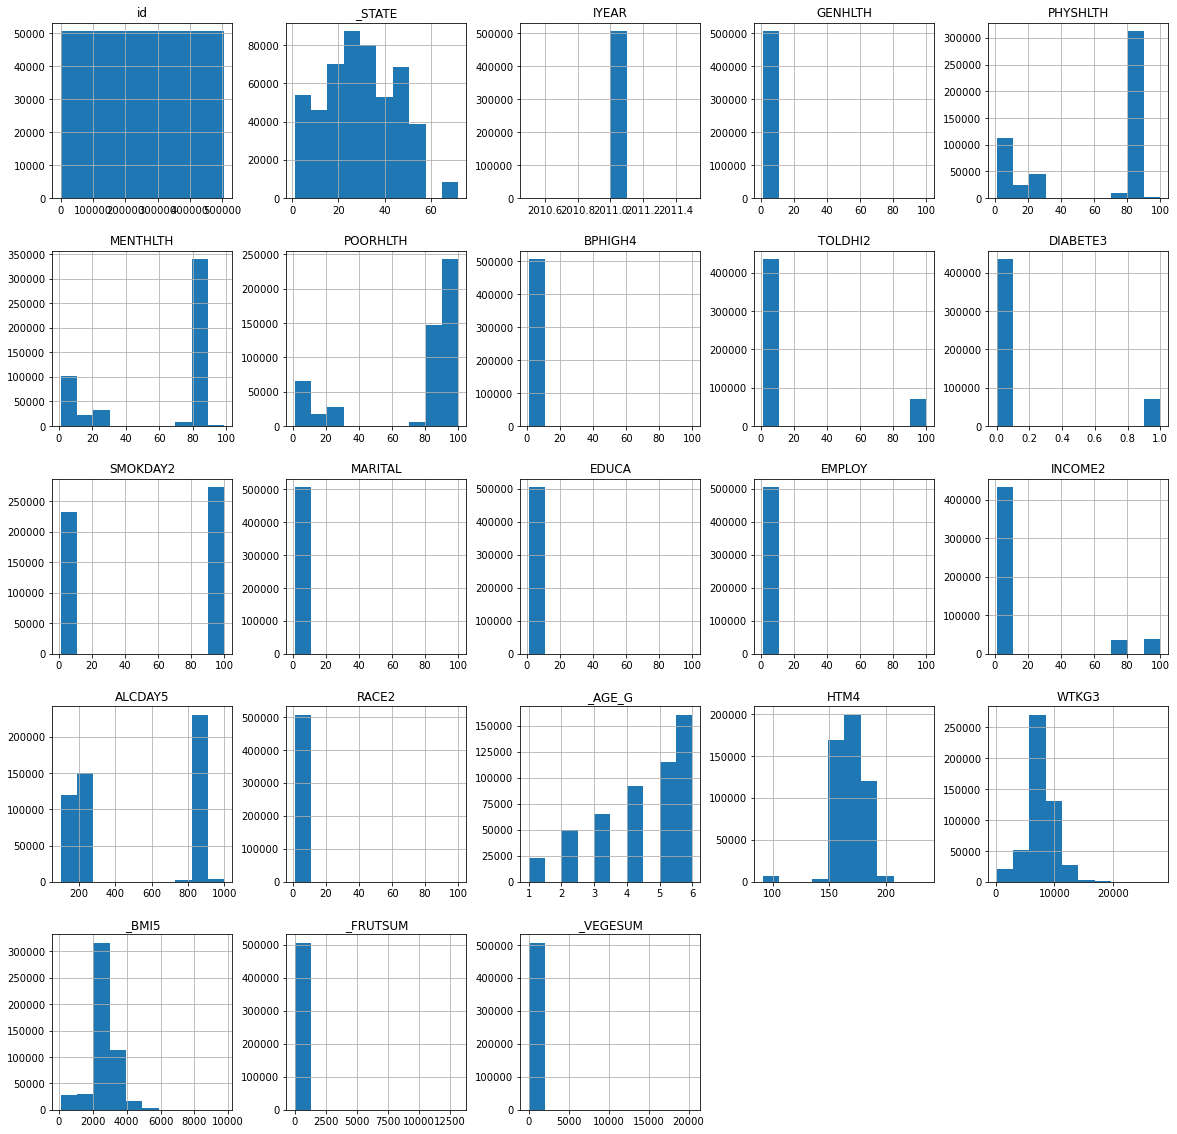

In [14]:
p = df.hist(figsize = (20,20))

In [15]:
# Correlation between all the features 

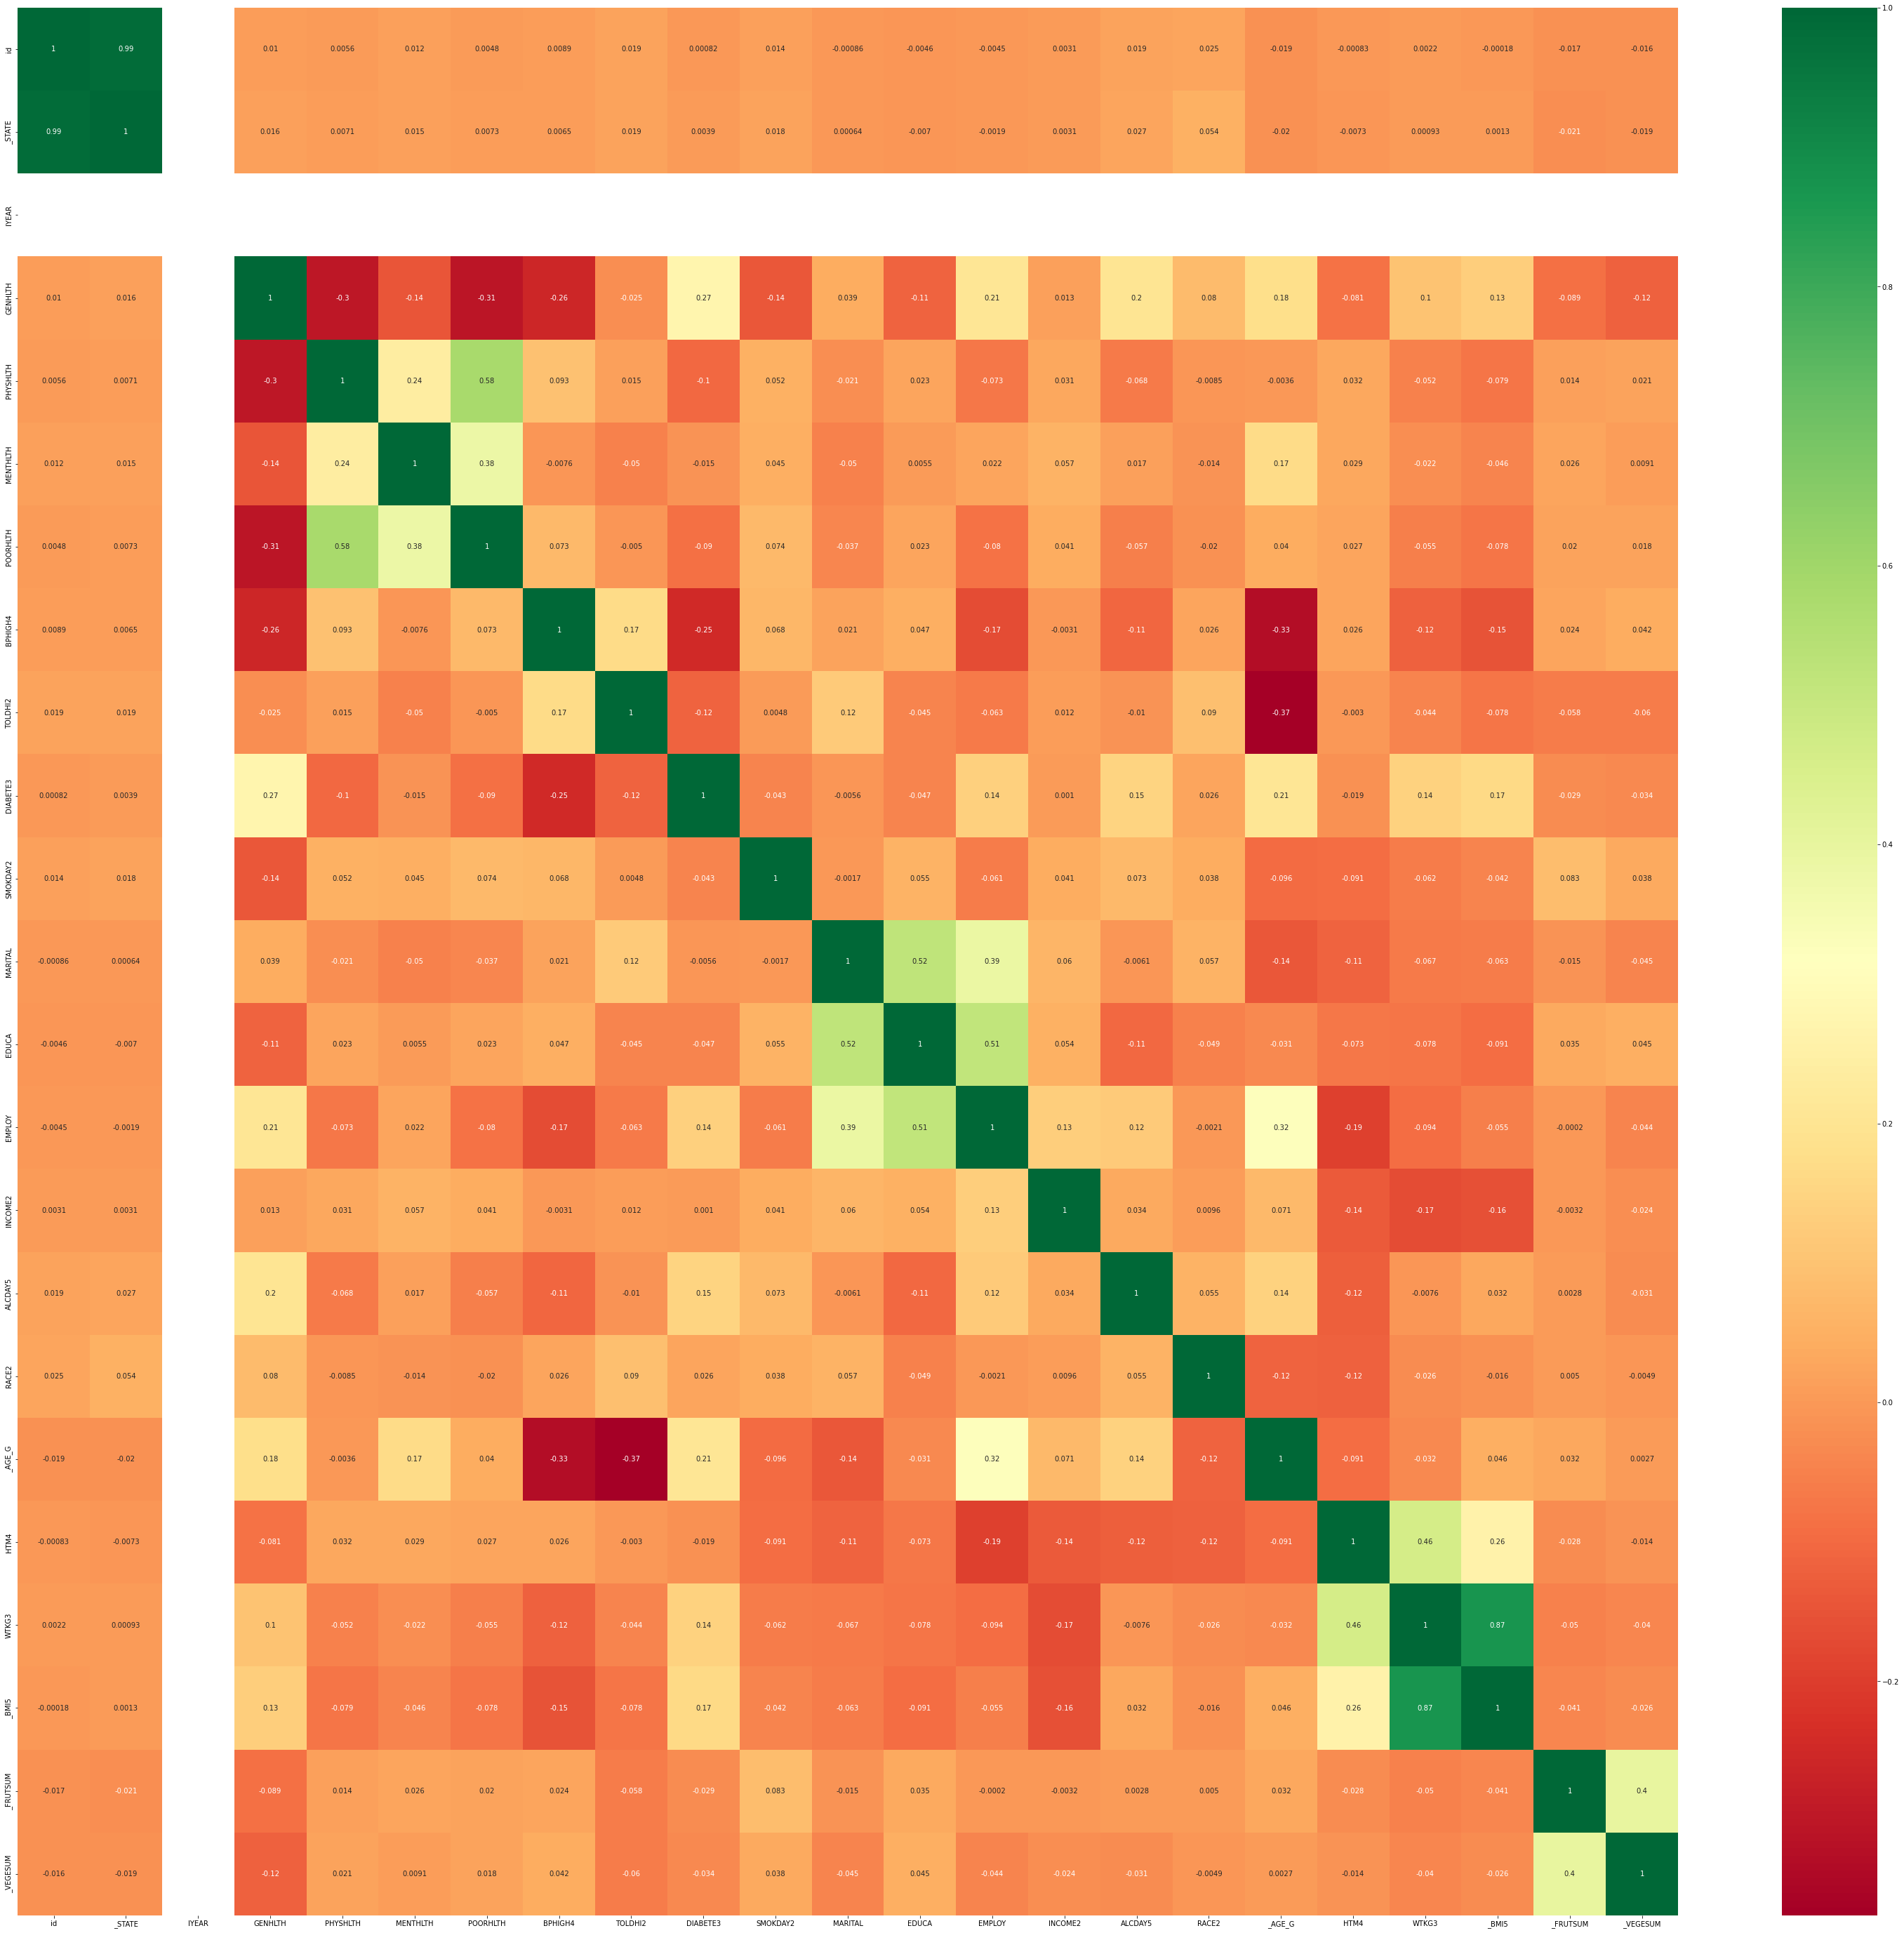

In [16]:
plt.figure(figsize=(53,50))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

In [17]:
# Check the Diabetes column - how balanced it is 

0.0    435827
1.0     70640
Name: DIABETE3, dtype: int64


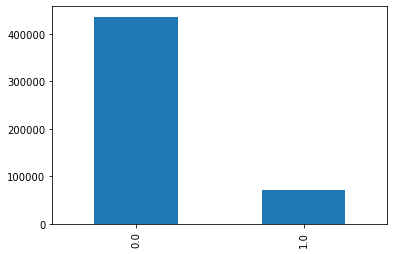

In [18]:
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = df["DIABETE3"].map(lambda x: color_wheel.get(x + 1))
print(df.DIABETE3.value_counts())
p=df.DIABETE3.value_counts().plot(kind="bar")

In [19]:
# Scaling the Data 

In [20]:
# Scaled data so that all values are on the same scale 
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df.drop(["DIABETE3"],axis = 1),), columns=[
'_STATE',
'IYEAR',
'GENHLTH',
'PHYSHLTH',
'MENTHLTH',
'POORHLTH',
'BPHIGH4',
'TOLDHI2',
'DIABETE3',
'SMOKDAY2',
'MARITAL',
'EDUCA',
'EMPLOY',
'INCOME2',
'ALCDAY5',
'RACE2',
'_AGE_G',
'HTM4',
'WTKG3',
'_BMI5',
'_FRUTSUM',
'_VEGESUM'])
X.head()

,_STATE,IYEAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,BPHIGH4,TOLDHI2,DIABETE3,SMOKDAY2,...,EMPLOY,INCOME2,ALCDAY5,RACE2,_AGE_G,HTM4,WTKG3,_BMI5,_FRUTSUM,_VEGESUM
0,-1.732047,-1.862929,0.0,1.182782,0.740244,-0.947720,0.308642,-1.136834,-0.420812,-1.112147,...,-0.731766,-0.459354,-1.086986,-0.362695,0.398315,-1.224070,-1.318299,-0.909260,-0.443972,0.416803
1,-1.732041,-1.862929,0.0,1.182782,-1.312101,-1.669807,-2.089579,-1.136834,-0.391492,-1.112147,...,1.016379,-0.425450,-1.095201,-0.362695,-1.594142,0.526994,1.290173,1.077483,1.964832,0.330359
2,-1.732034,-1.862929,0.0,-0.514210,0.740244,-1.697580,0.308642,-1.136834,-0.391492,-1.071044,...,-0.731766,-0.425450,-1.092462,-0.362695,0.398315,-0.005939,-1.137000,-1.099152,0.435433,-0.195510
3,-1.732027,-1.862929,0.0,0.334286,0.740244,0.663089,0.651245,0.722879,2.481808,0.922465,...,-0.731766,2.015633,-1.095201,-0.362695,0.398315,-0.234338,-0.231303,-0.049999,-0.329267,-0.613324
4,-1.732020,-1.862929,0.0,2.031278,-0.961042,-1.364309,-1.490024,-1.136834,-0.391492,-1.071044,...,1.016379,-0.561066,1.062541,0.010366,-0.265837,-0.995670,1.127243,2.047119,1.964832,0.006193


In [21]:
# Assess target column - Diabetes 
y = df.DIABETE3
y

0         0.0
1         0.0
2         0.0
3         0.0
4         1.0
         ... 
506462    0.0
506463    0.0
506464    0.0
506465    0.0
506466    0.0
Name: DIABETE3, Length: 506467, dtype: float64

In [22]:
# Model Building 

In [23]:
X = df.drop('DIABETE3', axis=1)
y = df['DIABETE3']

In [24]:
# split into training and testing data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,
                                                    random_state=7)

In [25]:
# Random Forest 

In [26]:
# Label Encoder so the orginal values are encoded as 0 or 1 
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

#view transformed values
print(y_transformed)



[0 0 0 ... 0 0 0]


In [27]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [28]:
rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 1.0


In [29]:
from sklearn import metrics

predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.8679989230262961


In [30]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[141043   2795]
 [ 19267   4030]]
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93    143838
         1.0       0.59      0.17      0.27     23297

    accuracy                           0.87    167135
   macro avg       0.74      0.58      0.60    167135
weighted avg       0.84      0.87      0.84    167135



In [31]:
# Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [33]:
from sklearn import metrics

predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.7999880336255123


In [34]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[125994  17844]
 [ 15585   7712]]
              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88    143838
         1.0       0.30      0.33      0.32     23297

    accuracy                           0.80    167135
   macro avg       0.60      0.60      0.60    167135
weighted avg       0.81      0.80      0.80    167135



In [35]:
# Feature Importance 

In [36]:
rfc.feature_importances_

array([0.08441813, 0.06236866, 0.        , 0.0553562 , 0.03389282,
       0.0278768 , 0.03032598, 0.0427918 , 0.03082205, 0.02236748,
       0.02707039, 0.03055547, 0.03543925, 0.0447393 , 0.03669323,
       0.0196104 , 0.03216793, 0.05378855, 0.0783693 , 0.101697  ,
       0.06674481, 0.08290444])

(<AxesSubplot:>,)

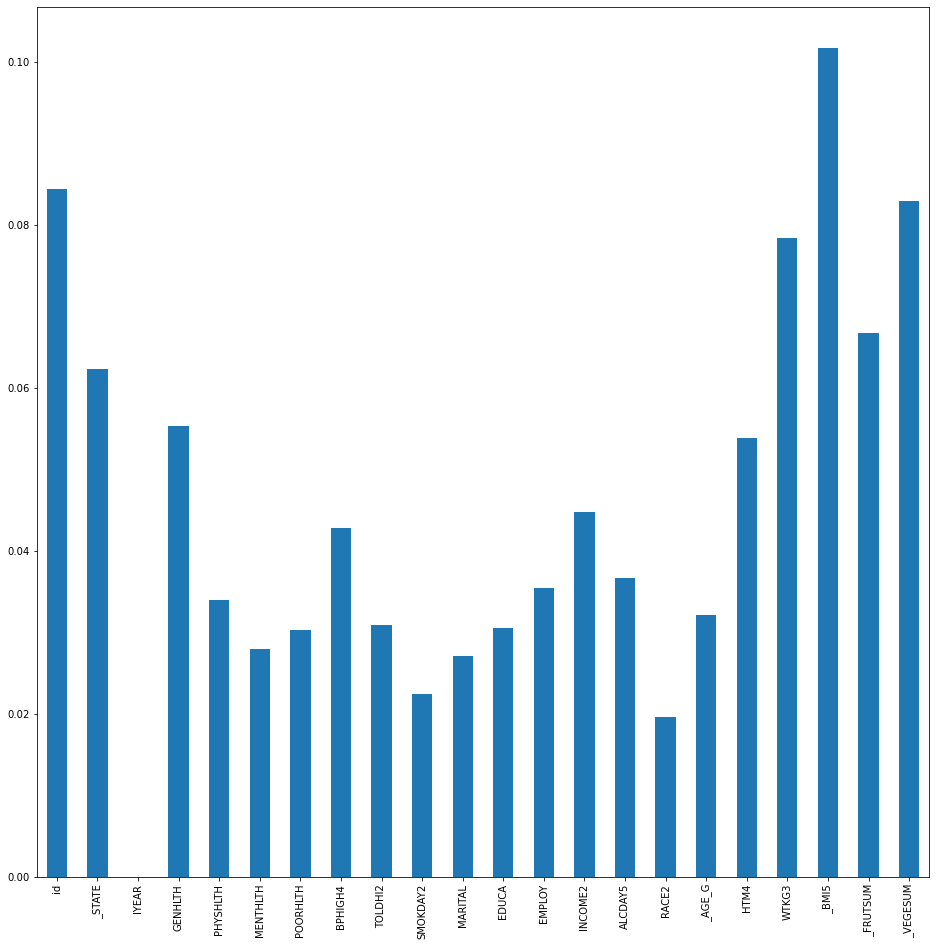

In [37]:
(pd.Series(rfc.feature_importances_, index=X.columns,).plot(kind='bar', figsize=(16,16)), )